<a href="https://colab.research.google.com/github/CoolerKula/Hypothesis-Testing---Independent-Project/blob/main/Hypothesis_Testing_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hypothesis Testing

## Defining the Question

You work as a data scientist for the telecom operator Megatelco. The company offers its
clients two prepaid plans, Surf and Ultimate. The commercial department wants to know
which of the plans brings in more revenue in order to adjust the advertising budget.
You are going to carry out a preliminary analysis of the plans based on a relatively small
client selection. You'll have the data on 500 Megatelco clients: who the clients are, where
they're from, which plan they use, and the number of calls they made and text messages
they sent in 2018. Your job is to analyze clients' behavior and determine which prepaid
plan brings in more revenue.

## Pre-requisites

In [ ]:
# load libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import os
import math
from scipy import stats as st

## Step 1. Open the data files and study the general information

In [ ]:
#Read data

message_df=pd.read_csv("megamessage_telco.csv")

calls_df=pd.read_csv("megatelco_calls.csv")

internet_df=pd.read_csv("megatelco_internet.csv")

plans_df=pd.read_csv("megatelco_plans.csv")

users_df=pd.read_csv("megatelco_users.csv")

In [ ]:
message_df.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [ ]:
calls_df.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [ ]:
internet_df.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


In [ ]:
plans_df

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [ ]:
users_df.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


## Step 2. Prepare the data

In [ ]:
message_df.dtypes

id              object
user_id          int64
message_date    object
dtype: object

In [ ]:
message_df.duplicated().sum()

0

In [ ]:
message_df.isnull().sum()

id              0
user_id         0
message_date    0
dtype: int64

In [ ]:
calls_df.dtypes

id            object
user_id        int64
call_date     object
duration     float64
dtype: object

In [ ]:
calls_df.duplicated().sum()

0

In [ ]:
calls_df.isnull().sum()

id           0
user_id      0
call_date    0
duration     0
dtype: int64

In [ ]:
internet_df.dtypes

id               object
user_id           int64
session_date     object
mb_used         float64
dtype: object

In [ ]:
internet_df.duplicated().sum()

0

In [ ]:
internet_df.isnull().sum()

id              0
user_id         0
session_date    0
mb_used         0
dtype: int64

In [ ]:
plans_df.dtypes

messages_included          int64
mb_per_month_included      int64
minutes_included           int64
usd_monthly_pay            int64
usd_per_gb                 int64
usd_per_message          float64
usd_per_minute           float64
plan_name                 object
dtype: object

In [ ]:
plans_df.duplicated().sum()

0

In [ ]:
plans_df.isnull().sum()

messages_included        0
mb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
plan_name                0
dtype: int64

In [ ]:
users_df.dtypes

user_id        int64
first_name    object
last_name     object
age            int64
city          object
reg_date      object
plan          object
churn_date    object
dtype: object

In [ ]:
users_df.duplicated().sum()

0

In [ ]:
users_df.isnull().sum()

user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64

In [ ]:
#change the column date datatype to date and extract month
message_df['message_date']= pd.to_datetime(message_df['message_date'])
message_df['Month'] = message_df['message_date'].dt.month
message_df.dtypes

id                      object
user_id                  int64
message_date    datetime64[ns]
Month                    int64
dtype: object

In [ ]:
calls_df['call_date']= pd.to_datetime(calls_df['call_date'])
calls_df['Month'] = calls_df['call_date'].dt.month
calls_df.dtypes

id                   object
user_id               int64
call_date    datetime64[ns]
duration            float64
Month                 int64
dtype: object

In [ ]:
internet_df['session_date']= pd.to_datetime(internet_df['session_date'])
internet_df['Month'] = internet_df['session_date'].dt.month
internet_df.dtypes

id                      object
user_id                  int64
session_date    datetime64[ns]
mb_used                float64
Month                    int64
dtype: object

In [ ]:
#Drop columns that will not be used
message_df=message_df.drop(['message_date'], axis=1)
calls_df=calls_df.drop(['id', 'call_date'], axis=1)
internet_df= internet_df.drop(['id', 'session_date'], axis=1)
users_df=users_df.drop(['first_name', 'last_name', 'age', 'reg_date', 'churn_date'], axis=1)

##Step 3. Analyze data

In [ ]:
#Preview data
message_df.head()

,id,user_id,Month
0,1000_125,1000,12
1,1000_160,1000,12
2,1000_223,1000,12
3,1000_251,1000,12
4,1000_255,1000,12


In [ ]:
calls_df.head()

,user_id,duration,Month
0,1000,8.52,12
1,1000,13.66,12
2,1000,14.48,12
3,1000,5.76,12
4,1000,4.22,12


In [ ]:
internet_df.head()

,user_id,mb_used,Month
0,1000,89.86,12
1,1000,0.00,12
2,1000,660.40,12
3,1000,270.99,12
4,1000,880.22,12


In [ ]:
plans_df

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [ ]:
users_df.head()

,user_id,city,plan
0,1000,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate
1,1001,"Seattle-Tacoma-Bellevue, WA MSA",surf
2,1002,"Las Vegas-Henderson-Paradise, NV MSA",surf
3,1003,"Tulsa, OK MSA",surf
4,1004,"Seattle-Tacoma-Bellevue, WA MSA",surf


In [ ]:
# Find the number of calls made and minutes used per month
monthlycalls = (calls_df.groupby([ 'user_id', 'Month']).count().reset_index())
monthlycalls

,user_id,Month,duration
0,1000,12,16
1,1001,8,27
2,1001,9,49
3,1001,10,65
4,1001,11,64
...,...,...,...
2253,1498,12,39
2254,1499,9,41
2255,1499,10,53
2256,1499,11,45


In [ ]:
calls_df['duration'] = calls_df['duration'].apply(np.ceil)
monthlycall_duration = (calls_df.groupby([ 'user_id', 'Month']).sum().reset_index())
monthlycall_duration

,user_id,Month,duration
0,1000,12,124.0
1,1001,8,182.0
2,1001,9,315.0
3,1001,10,393.0
4,1001,11,426.0
...,...,...,...
2253,1498,12,339.0
2254,1499,9,346.0
2255,1499,10,385.0
2256,1499,11,308.0


In [ ]:
# Find the number of text messages sent per month
monthlymessage = (message_df.groupby([ 'user_id', 'Month']).count().reset_index())
monthlymessage.rename(columns={'id': 'messages'}, inplace=True)
monthlymessage
#monthlymessage['messages'].groupby([monthlymessage['Month']]).sum()

,user_id,Month,messages
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
...,...,...,...
1801,1496,9,21
1802,1496,10,18
1803,1496,11,13
1804,1496,12,11


In [ ]:
#Find the volume of data per month
monthly_data=(internet_df.groupby([ 'user_id', 'Month']).sum().reset_index())
monthly_data['mb_used'] = (monthly_data['mb_used']/1024).apply(np.ceil)
monthly_data.rename(columns = {'mb_used':'GB_used'}, inplace = True)
monthly_data
#monthly_data['GB_used'].groupby([monthly_data['Month']]).sum()

,user_id,Month,GB_used
0,1000,12,2.0
1,1001,8,7.0
2,1001,9,14.0
3,1001,10,22.0
4,1001,11,19.0
...,...,...,...
2272,1498,12,23.0
2273,1499,9,13.0
2274,1499,10,20.0
2275,1499,11,17.0


In [ ]:
#merging the dataframes
data_frames = [users_df,monthlymessage, monthlycall_duration, monthly_data]
from functools import reduce
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['user_id'],how='outer'), data_frames)

df_merged.head()

,user_id,city,plan,Month_x,messages,Month_y,duration,Month,GB_used
0,1000,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,12.0,11.0,12.0,124.0,12.0,2.0
1,1001,"Seattle-Tacoma-Bellevue, WA MSA",surf,8.0,30.0,8.0,182.0,8.0,7.0
2,1001,"Seattle-Tacoma-Bellevue, WA MSA",surf,8.0,30.0,8.0,182.0,9.0,14.0
3,1001,"Seattle-Tacoma-Bellevue, WA MSA",surf,8.0,30.0,8.0,182.0,10.0,22.0
4,1001,"Seattle-Tacoma-Bellevue, WA MSA",surf,8.0,30.0,8.0,182.0,11.0,19.0


In [ ]:
df_merged = df_merged.drop(columns=['Month_x', 'Month_y'])
df_merged.head()

,user_id,city,plan,messages,duration,Month,GB_used
0,1000,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,11.0,124.0,12.0,2.0
1,1001,"Seattle-Tacoma-Bellevue, WA MSA",surf,30.0,182.0,8.0,7.0
2,1001,"Seattle-Tacoma-Bellevue, WA MSA",surf,30.0,182.0,9.0,14.0
3,1001,"Seattle-Tacoma-Bellevue, WA MSA",surf,30.0,182.0,10.0,22.0
4,1001,"Seattle-Tacoma-Bellevue, WA MSA",surf,30.0,182.0,11.0,19.0


In [ ]:
#Impute null values with 0 and convert columns into proper datatypes
df_merged=df_merged.replace(np.nan, 0)
df_merged[['Month', 'messages', 'duration', 'GB_used']] = df_merged[['Month', 'messages', 'duration', 'GB_used']].astype(int)
df_merged[['city', 'plan']] = df_merged[['city', 'plan']].astype(str)
df_merged.dtypes
#df_merged.describe

user_id      int64
city        object
plan        object
messages     int64
duration     int64
Month        int64
GB_used      int64
dtype: object

In [ ]:
#Rename plans_df plan column to match user_df plan column
plans_df.rename(columns={'plan_name': 'plan'}, inplace=True)

#convert mb to GB
plans_df['mb_per_month_included']=plans_df['mb_per_month_included']/1024
plans_df.rename(columns = {'mb_per_month_included':'GB_per_month_included'}, inplace = True)
plans_df


,messages_included,GB_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan
0,50,15.0,500,20,10,0.03,0.03,surf
1,1000,30.0,3000,70,7,0.01,0.01,ultimate


In [ ]:
data_ff = [df_merged, plans_df]
df_merged1 = reduce(lambda  left,right: pd.merge(left,right,on=['plan'],how='outer'), data_ff)
df_merged1.head(2)

,user_id,city,plan,messages,duration,Month,GB_used,messages_included,GB_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,1000,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,11,124,12,2,1000,30.0,3000,70,7,0.01,0.01
1,1006,"San Francisco-Oakland-Berkeley, CA MSA",ultimate,15,10,11,3,1000,30.0,3000,70,7,0.01,0.01


In [ ]:
options = ['surf']
options2 = ['ultimate']
surf_customers = df_merged1.loc[df_merged1['plan'].isin(options)]
ultimate_customers= df_merged1.loc[df_merged1['plan'].isin(options2)]

print(surf_customers, ultimate_customers)

       user_id  ... usd_per_minute
28797     1001  ...           0.03
28798     1001  ...           0.03
28799     1001  ...           0.03
28800     1001  ...           0.03
28801     1001  ...           0.03
...        ...  ...            ...
88291     1499  ...           0.03
88292     1499  ...           0.03
88293     1499  ...           0.03
88294     1499  ...           0.03
88295     1499  ...           0.03

[59499 rows x 14 columns]        user_id  ... usd_per_minute
0         1000  ...           0.01
1         1006  ...           0.01
2         1006  ...           0.01
3         1006  ...           0.01
4         1006  ...           0.01
...        ...  ...            ...
28792     1493  ...           0.01
28793     1493  ...           0.01
28794     1493  ...           0.01
28795     1493  ...           0.01
28796     1497  ...           0.01

[28797 rows x 14 columns]


In [ ]:
#function to calculate surf plan monthly revenue

def evaluateCharges(input_data):
    
   
    input_data['TotalmonthlyCharges']= input_data['usd_monthly_pay']
    
    
    #performing different actions based on the conditions indicated in the question.
    
    input_data.loc[input_data['duration'] > 500, 'TotalmonthlyCharges'] = input_data['TotalmonthlyCharges']+(input_data['duration']-500)*0.03 
    
    input_data.loc[input_data['messages'] > 50, 'TotalmonthlyCharges']= input_data['TotalmonthlyCharges']+ (input_data['messages']-50)*0.03 
    
    input_data.loc[input_data['GB_used'] > 15, 'TotalmonthlyCharges'] = input_data['TotalmonthlyCharges']+ (input_data['GB_used']-15)*10 
    

    
    return input_data




In [ ]:
surfmonthly_revenue_peruser = evaluateCharges(surf_customers)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https

In [ ]:
surfmonthly_revenue_peruser.head()

,user_id,city,plan,messages,duration,Month,GB_used,messages_included,GB_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,TotalmonthlyCharges
28797,1001,"Seattle-Tacoma-Bellevue, WA MSA",surf,30,182,8,7,50,15.0,500,20,10,0.03,0.03,20.0
28798,1001,"Seattle-Tacoma-Bellevue, WA MSA",surf,30,182,9,14,50,15.0,500,20,10,0.03,0.03,20.0
28799,1001,"Seattle-Tacoma-Bellevue, WA MSA",surf,30,182,10,22,50,15.0,500,20,10,0.03,0.03,90.0
28800,1001,"Seattle-Tacoma-Bellevue, WA MSA",surf,30,182,11,19,50,15.0,500,20,10,0.03,0.03,60.0
28801,1001,"Seattle-Tacoma-Bellevue, WA MSA",surf,30,182,12,19,50,15.0,500,20,10,0.03,0.03,60.0


In [ ]:
#function to calculate ultimate plan monthly revenue
def evaluateCharges_ultimateplan(input_data1):
    
   
    input_data1['TotalmonthlyCharges']= input_data1['usd_monthly_pay']
    
    #performing different actions based on the conditions indicated in the question.
    
    input_data1.loc[input_data1['duration'] > 3000, 'TotalmonthlyCharges'] = input_data1['TotalmonthlyCharges'] +(input_data1['duration']-3000) * 0.01 
    
    input_data1.loc[input_data1['messages'] > 1000, 'TotalmonthlyCharges']= input_data1['TotalmonthlyCharges'] + (input_data1['messages']-1000) * 0.01 
    
    input_data1.loc[input_data1['GB_used'] > 30, 'TotalmonthlyCharges'] = input_data1['TotalmonthlyCharges'] + (input_data1['GB_used'] - 30) * 7 
    
    return input_data1

In [ ]:
ultimatemonthly_revenue_peruser=evaluateCharges_ultimateplan(ultimate_customers)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [ ]:
ultimatemonthly_revenue_peruser.sample(5)

,user_id,city,plan,messages,duration,Month,GB_used,messages_included,GB_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,TotalmonthlyCharges
4521,1061,"Columbia, SC MSA",ultimate,54,446,11,19,1000,30.0,3000,70,7,0.01,0.01,70
24128,1412,"Detroit-Warren-Dearborn, MI MSA",ultimate,54,955,7,22,1000,30.0,3000,70,7,0.01,0.01,70
15557,1199,"San Antonio-New Braunfels, TX MSA",ultimate,80,542,9,16,1000,30.0,3000,70,7,0.01,0.01,70
21641,1346,"Tucson, AZ MSA",ultimate,66,250,10,19,1000,30.0,3000,70,7,0.01,0.01,70
2836,1043,"New York-Newark-Jersey City, NY-NJ-PA MSA",ultimate,102,321,9,32,1000,30.0,3000,70,7,0.01,0.01,84


In [ ]:
#surf plan Average
monthyusage=surfmonthly_revenue_peruser[['user_id', 'messages','duration', 'GB_used']]
monthyaverage= monthyusage.groupby([ 'user_id']).mean().reset_index()
monthyaverage.head()

,user_id,messages,duration,GB_used
0,1001,41.400000,345.600000,16.200000
1,1002,29.333333,276.333333,13.666667
2,1003,50.000000,1104.000000,27.000000
3,1004,22.125000,346.500000,19.625000
4,1005,11.000000,496.000000,17.000000


In [ ]:
#surf plan Variance and standard deviation
monthyusage.var()
monthyusage.std()

user_id     127.412141
messages     30.436120
duration    229.271542
GB_used       7.113972
dtype: float64

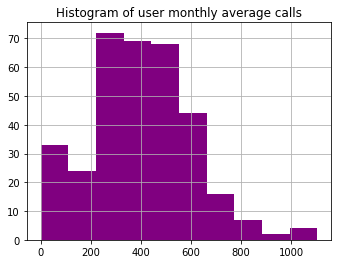

In [ ]:
#plots of distribution of average user monthly calls
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (12, 4))

plt.subplot(1, 2, 1)
monthyaverage.duration.hist(color = '#800080')
plt.title('Histogram of user monthly average calls')

plt.show()


In [ ]:
#ultimate plan

monthyusage_ultimate=ultimatemonthly_revenue_peruser[['user_id', 'messages','duration', 'GB_used']]
monthyaverage_ultimate= monthyusage_ultimate.groupby([ 'user_id']).mean().reset_index()
monthyaverage_ultimate.head()

,user_id,messages,duration,GB_used
0,1000,11.0,124.000000,2.000000
1,1006,77.0,34.500000,17.500000
2,1008,28.0,518.666667,18.666667
3,1011,53.0,415.285714,18.857143
4,1013,16.0,219.000000,20.000000


In [ ]:
#ultimate plan Variance and standard deviation
monthyusage_ultimate.var()
monthyusage_ultimate.std()

user_id     143.475582
messages     31.993832
duration    241.746533
GB_used       7.618901
dtype: float64

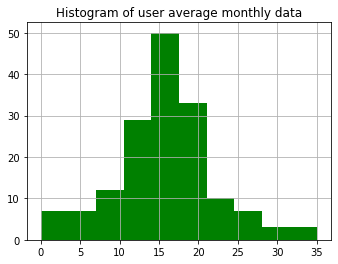

In [ ]:
#plots of distribution average user monthly data
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (12, 4))

plt.subplot(1, 2, 1)
monthyaverage_ultimate.GB_used.hist(color = '#008000')
plt.title('Histogram of user average monthly data')

plt.show()

##Step 4. Test the hypothesis
● The average revenue from users of Ultimate and those of Surf calling plans are not the same.


In [ ]:

#Null Hypothesis-The average revenue from users of Ultimate and Surf calling plans is the similar
#Alternate Hypothesis-The average revenue from users of Ultimate and Surf calling plans differs

revenue_ultimate=ultimatemonthly_revenue_peruser['TotalmonthlyCharges']
revenue_surf=surfmonthly_revenue_peruser['TotalmonthlyCharges']

alpha = 0.05  # critical statistical significance level
# if the p-value is less than alpha, we reject the hypothesis

results = st.ttest_ind(revenue_ultimate, revenue_surf)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value:  0.0
We reject the null hypothesis





#### ● The average revenue from users in NY-NJ area differs from that of the users from other regions.

In [ ]:
#combine the surf plan and ultimate plan records to get combined records
surfmonthly_revenue_peruser.columns = ultimatemonthly_revenue_peruser.columns
frame_combined = pd.concat([surfmonthly_revenue_peruser, ultimatemonthly_revenue_peruser], ignore_index=True)
frame_combined

,user_id,city,plan,messages,duration,Month,GB_used,messages_included,GB_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,TotalmonthlyCharges
0,1001,"Seattle-Tacoma-Bellevue, WA MSA",surf,30,182,8,7,50,15.0,500,20,10,0.03,0.03,20.0
1,1001,"Seattle-Tacoma-Bellevue, WA MSA",surf,30,182,9,14,50,15.0,500,20,10,0.03,0.03,20.0
2,1001,"Seattle-Tacoma-Bellevue, WA MSA",surf,30,182,10,22,50,15.0,500,20,10,0.03,0.03,90.0
3,1001,"Seattle-Tacoma-Bellevue, WA MSA",surf,30,182,11,19,50,15.0,500,20,10,0.03,0.03,60.0
4,1001,"Seattle-Tacoma-Bellevue, WA MSA",surf,30,182,12,19,50,15.0,500,20,10,0.03,0.03,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88291,1493,"Boston-Cambridge-Newton, MA-NH MSA",ultimate,0,473,9,15,1000,30.0,3000,70,7,0.01,0.01,70.0
88292,1493,"Boston-Cambridge-Newton, MA-NH MSA",ultimate,0,473,10,16,1000,30.0,3000,70,7,0.01,0.01,70.0
88293,1493,"Boston-Cambridge-Newton, MA-NH MSA",ultimate,0,473,11,16,1000,30.0,3000,70,7,0.01,0.01,70.0
88294,1493,"Boston-Cambridge-Newton, MA-NH MSA",ultimate,0,473,12,15,1000,30.0,3000,70,7,0.01,0.01,70.0


In [ ]:
# Filter out records containing 'NY-NJ' in the city column
from pandas import DataFrame
options_NYNJ = frame_combined[frame_combined["city"].str.contains("NY-NJ")]
options_NYNJ.head()

,user_id,city,plan,messages,duration,Month,GB_used,messages_included,GB_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,TotalmonthlyCharges
940,1014,"New York-Newark-Jersey City, NY-NJ-PA MSA",surf,9,163,11,2,50,15.0,500,20,10,0.03,0.03,20.00
941,1014,"New York-Newark-Jersey City, NY-NJ-PA MSA",surf,9,163,12,8,50,15.0,500,20,10,0.03,0.03,20.00
942,1014,"New York-Newark-Jersey City, NY-NJ-PA MSA",surf,9,1114,11,2,50,15.0,500,20,10,0.03,0.03,38.42
943,1014,"New York-Newark-Jersey City, NY-NJ-PA MSA",surf,9,1114,12,8,50,15.0,500,20,10,0.03,0.03,38.42
944,1014,"New York-Newark-Jersey City, NY-NJ-PA MSA",surf,64,163,11,2,50,15.0,500,20,10,0.03,0.03,20.42


In [ ]:
#drop records containing 'NY-NJ' from the main data frame to remain with other areas  records 
otherareas_df= frame_combined[frame_combined["city"].str.contains("NY-NJ")==False]
otherareas_df

,user_id,city,plan,messages,duration,Month,GB_used,messages_included,GB_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,TotalmonthlyCharges
0,1001,"Seattle-Tacoma-Bellevue, WA MSA",surf,30,182,8,7,50,15.0,500,20,10,0.03,0.03,20.0
1,1001,"Seattle-Tacoma-Bellevue, WA MSA",surf,30,182,9,14,50,15.0,500,20,10,0.03,0.03,20.0
2,1001,"Seattle-Tacoma-Bellevue, WA MSA",surf,30,182,10,22,50,15.0,500,20,10,0.03,0.03,90.0
3,1001,"Seattle-Tacoma-Bellevue, WA MSA",surf,30,182,11,19,50,15.0,500,20,10,0.03,0.03,60.0
4,1001,"Seattle-Tacoma-Bellevue, WA MSA",surf,30,182,12,19,50,15.0,500,20,10,0.03,0.03,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88291,1493,"Boston-Cambridge-Newton, MA-NH MSA",ultimate,0,473,9,15,1000,30.0,3000,70,7,0.01,0.01,70.0
88292,1493,"Boston-Cambridge-Newton, MA-NH MSA",ultimate,0,473,10,16,1000,30.0,3000,70,7,0.01,0.01,70.0
88293,1493,"Boston-Cambridge-Newton, MA-NH MSA",ultimate,0,473,11,16,1000,30.0,3000,70,7,0.01,0.01,70.0
88294,1493,"Boston-Cambridge-Newton, MA-NH MSA",ultimate,0,473,12,15,1000,30.0,3000,70,7,0.01,0.01,70.0


In [ ]:
#Test Hypothesis

#Null Hypothesis-The average revenue from users in NY-NJ area is similar with that of the users from other regions
#Alternate Hypothesis-The average revenue from users in NY-NJ area is different from that of the users from other regions

revenue_NY = options_NYNJ['TotalmonthlyCharges']
revenue_other_areas=otherareas_df['TotalmonthlyCharges']

from scipy import stats as st
import numpy as np


alpha = 0.05  # critical statistical significance level
# if the p-value is less than alpha, we reject the hypothesis

results = st.ttest_ind(revenue_NY, revenue_other_areas)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value:  4.740481931727458e-173
We reject the null hypothesis


### **Step 5. Write an overall conclusion**

Customers who use the Surf plan spend nearly the same resources as those who use the Ultimate plan, indicating that Megatelco customers choose the less expensive plan (Surf) over the more expensive plan (Ultimate).Despite the fact that clients on the Surf plan used about equivalent resources as those on the Ultimate plan, the latter plan generates more income than the former. As a result, the corporation should devote more marketing resources to the Ultimate plan rather than the Surf plan.